In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303 

Text(0, 0.5, 'b')

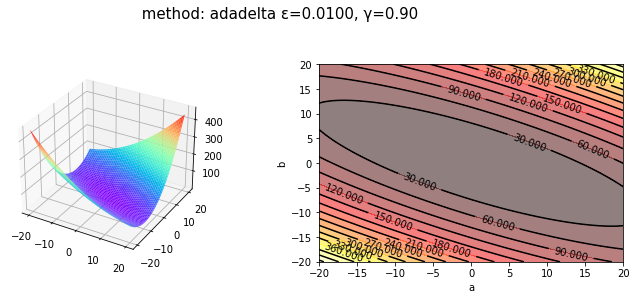

In [2]:
epsilon = 1e-2
gamma = 0.9
def da(y,y_p,x):
    return (y-y_p)*(-x)

def db(y,y_p):
    return (y-y_p)*(-1)
def calc_loss(a,b,x,y):
    tmp = y - (a * x + b)
    tmp = tmp ** 2  
    SSE = sum(tmp) / (2 * len(x))
    return SSE
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    print(a)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)

    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            SSE = calc_loss(a=a0,b=b0,x=x,y=y)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

x = [30	,35,37,	59,	70,	76,	88,	100]
y = [1100,	1423,	1377,	1800,	2304,	2588,	3495,	4839]


x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0,len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

[ha,hb,hallSSE] = draw_hill(x,y)
hallSSE = hallSSE.T

a = 10.0
b = -20.0
fig = plt.figure(1, figsize=(12, 8))
fig.suptitle(' method: adadelta ε=%.4f, γ=%.2f'%(epsilon,gamma), fontsize=15)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_top_view()
ax.plot_surface(ha, hb, hallSSE, rstride=2, cstride=2, cmap='rainbow')


plt.subplot(2,2,2)
ta = np.linspace(-20, 20, 100)
tb = np.linspace(-20, 20, 100)
plt.contourf(ha,hb,hallSSE,15,alpha=0.5,cmap=plt.cm.hot)
C = plt.contour(ha,hb,hallSSE,15,colors='black')
plt.clabel(C,inline=True)
plt.xlabel('a')
plt.ylabel('b')

step:  1  loss:  231.7413652386339 rms_pear:  [0.1 0.1]  rms_apple [8705.66621682 1430.96456719]


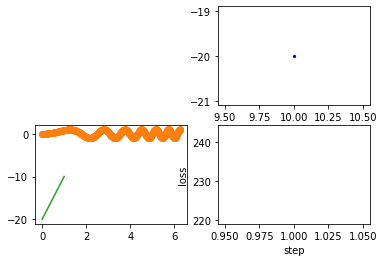

step:  2  loss:  207.42274537114565 rms_pear:  [0.14142136 0.14142136]  rms_apple [11535.16322645  1855.76935217]


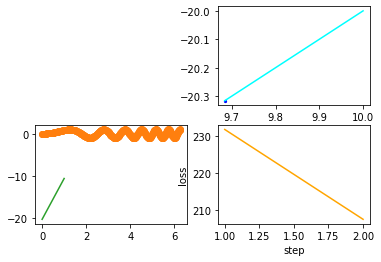

step:  3  loss:  185.48371099725765 rms_pear:  [0.16955093 0.16821883]  rms_apple [13216.79254094  2077.34447099]


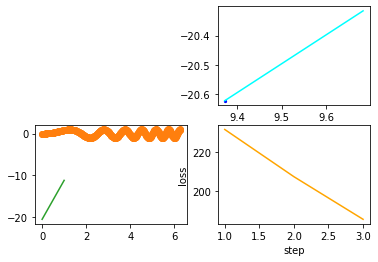

step:  4  loss:  166.3078183706574 rms_pear:  [0.18950589 0.18558222]  rms_apple [14262.89203635  2186.66939001]


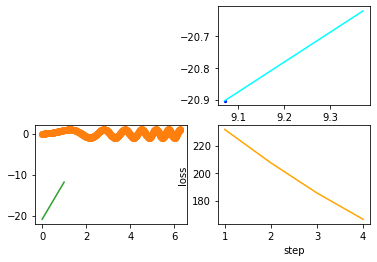

step:  5  loss:  149.85012235560248 rms_pear:  [0.2036658  0.19611911]  rms_apple [14892.56951028  2224.01750953]


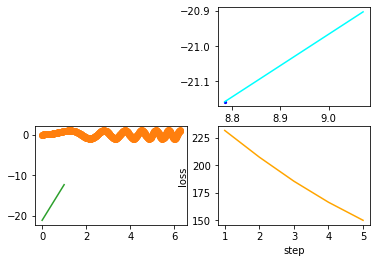

step:  6  loss:  135.89193192618643 rms_pear:  [0.21347106 0.20153307]  rms_apple [15228.77363705  2212.68919984]


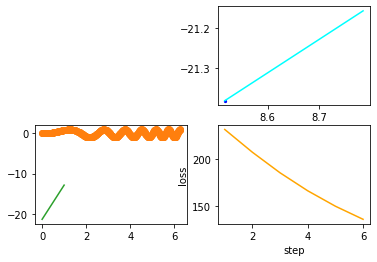

step:  7  loss:  124.14745589327646 rms_pear:  [0.21991085 0.20307715]  rms_apple [15350.41677712  2168.03490734]


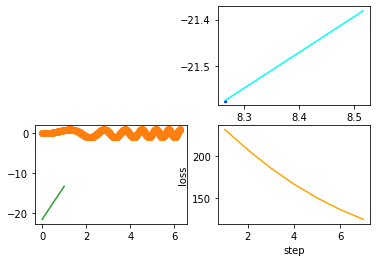

step:  8  loss:  114.316055011141 rms_pear:  [0.2237138 0.2017316]  rms_apple [15312.23642729  2100.93920896]


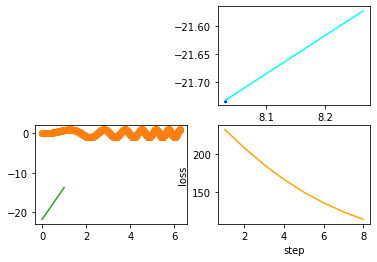

step:  9  loss:  106.10898096080662 rms_pear:  [0.22543948 0.19828993]  rms_apple [15154.08192721  2019.47477427]


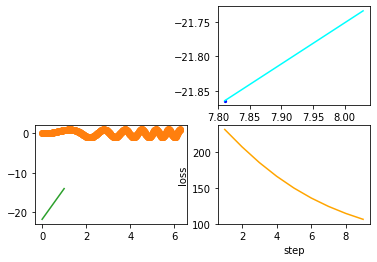

step:  10  loss:  99.26253503555121 rms_pear:  [0.2255288  0.19340716]  rms_apple [14905.88960864  1929.80208551]


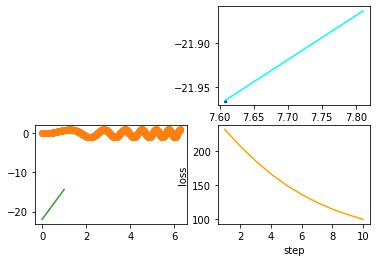

step:  11  loss:  93.54355774338781 rms_pear:  [0.22433484 0.18762977]  rms_apple [14590.62329337  1836.70711753]


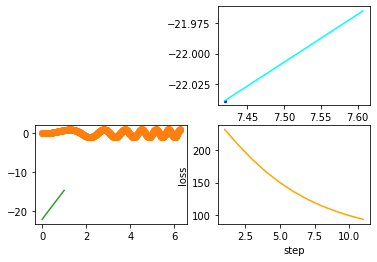

step:  12  loss:  88.7505238161487 rms_pear:  [0.22214323 0.18141563]  rms_apple [14226.14587058  1743.94328546]


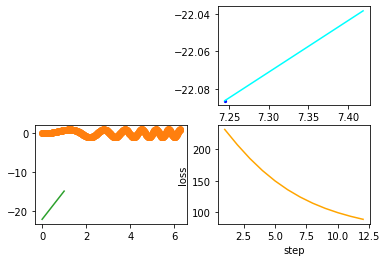

step:  13  loss:  84.71217734357991 rms_pear:  [0.21918651 0.17514759]  rms_apple [13826.48046948  1654.45634749]


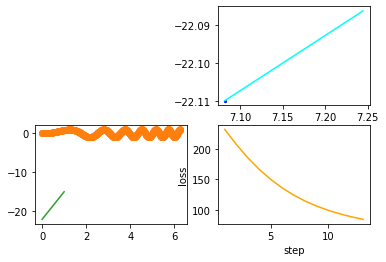

step:  14  loss:  81.28488707555272 rms_pear:  [0.21565462 0.1691427 ]  rms_apple [13402.69881873  1570.533127  ]


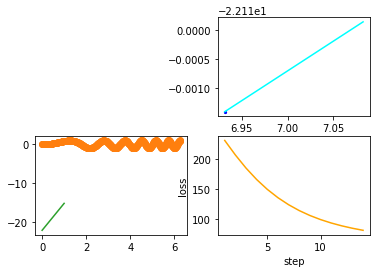

step:  15  loss:  78.3494473493147 rms_pear:  [0.21170299 0.16365802]  rms_apple [12963.56893128  1493.89779421]


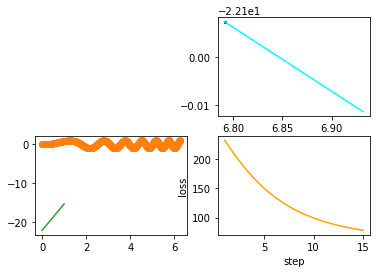

step:  16  loss:  75.80776504313779 rms_pear:  [0.2074588 0.1588941]  rms_apple [12516.04007853  1425.77209057]


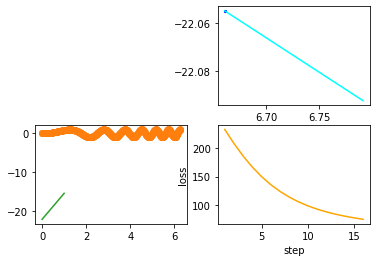

step:  17  loss:  73.57969023761567 rms_pear:  [0.20302601 0.15499681]  rms_apple [12065.6134452   1366.91343829]


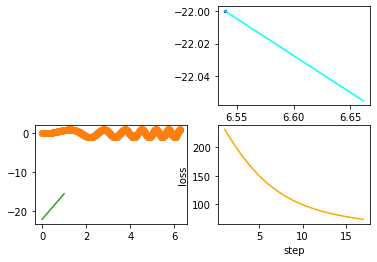

step:  18  loss:  71.60012981883219 rms_pear:  [0.19848941 0.15205883]  rms_apple [11616.6298651   1317.64442336]


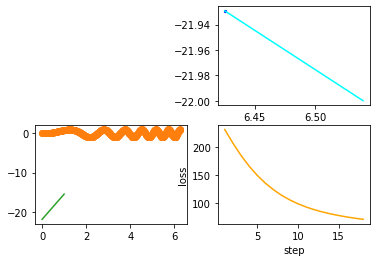

step:  19  loss:  69.81650611298917 rms_pear:  [0.1939179  0.15012186]  rms_apple [11172.49584069  1277.88629835]


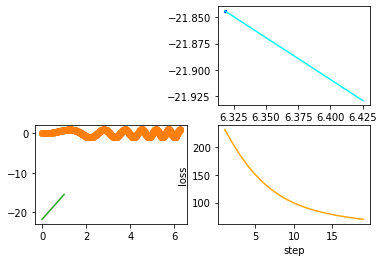

step:  20  loss:  68.18657271773527 rms_pear:  [0.18936717 0.14918056]  rms_apple [10735.86268804  1247.20614014]


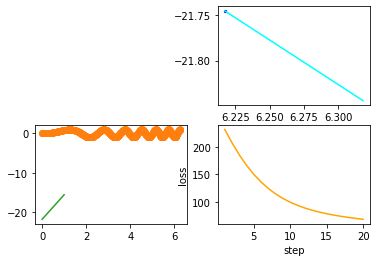

step:  21  loss:  66.67656861730784 rms_pear:  [0.18488198 0.14918884]  rms_apple [10308.76953427  1224.88167633]


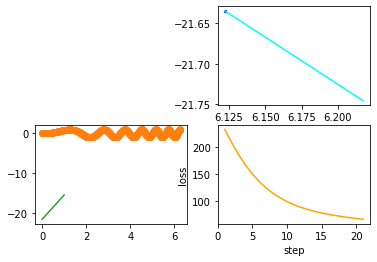

step:  22  loss:  65.25967453343688 rms_pear:  [0.18049792 0.15006822]  rms_apple [9892.75812905 1209.98093542]


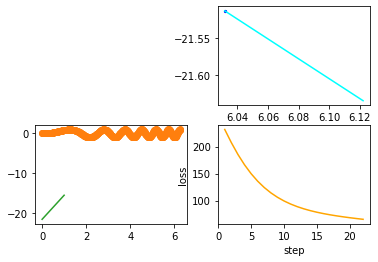

step:  23  loss:  63.91472892023785 rms_pear:  [0.17624296 0.15171748]  rms_apple [9488.96549588 1201.44831635]


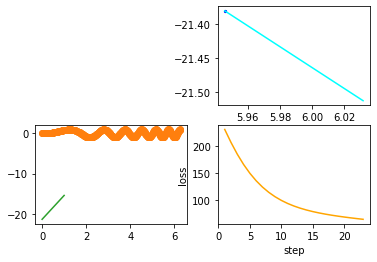

step:  24  loss:  62.62516193614276 rms_pear:  [0.1721387  0.15402238]  rms_apple [9098.19904155 1198.18650951]


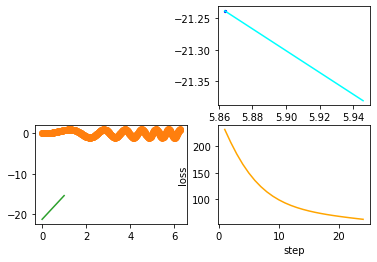

step:  25  loss:  61.37811088932971 rms_pear:  [0.16820141 0.15686456]  rms_apple [8720.99768902 1199.12527541]


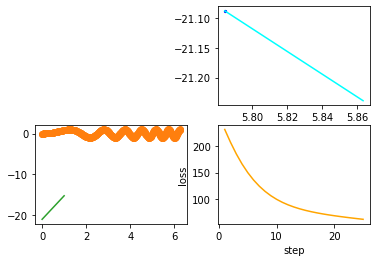

step:  26  loss:  60.16368718444121 rms_pear:  [0.16444289 0.16012855]  rms_apple [8357.68180157 1203.27200775]


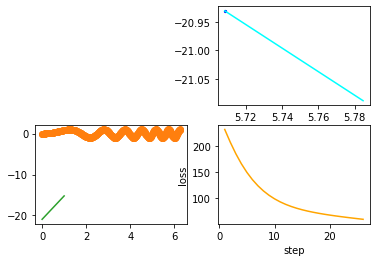

step:  27  loss:  58.97437077154626 rms_pear:  [0.1608712  0.16370686]  rms_apple [8008.39406196 1209.74327457]


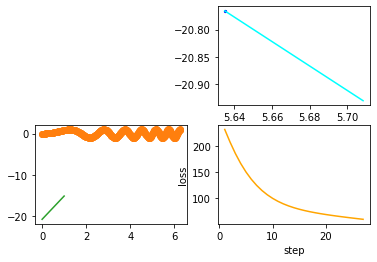

step:  28  loss:  57.804512694767375 rms_pear:  [0.15749128 0.16750312]  rms_apple [7673.1330147  1217.77968891]


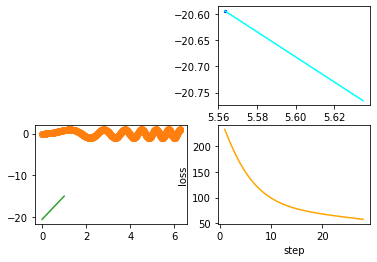

step:  29  loss:  56.64992955989319 rms_pear:  [0.15430542 0.17143359]  rms_apple [7351.78063658 1226.74802653]


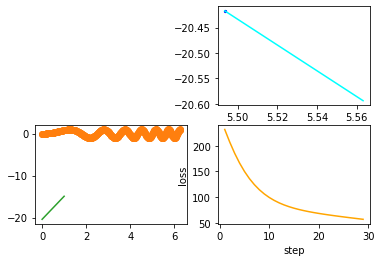

step:  30  loss:  55.50757596773968 rms_pear:  [0.15131374 0.17542749]  rms_apple [7044.1250401  1236.13473839]


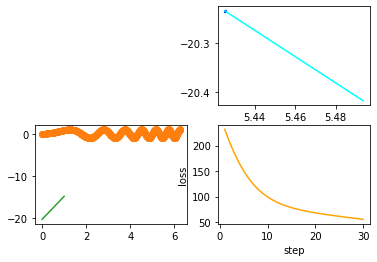

step:  31  loss:  54.37528261256002 rms_pear:  [0.14851452 0.17942645]  rms_apple [6749.87921431 1245.53443732]


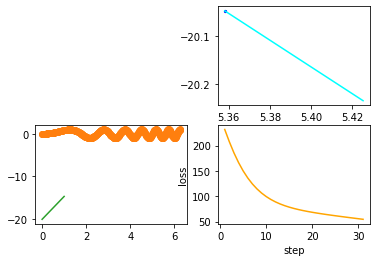

step:  32  loss:  53.25154912473896 rms_pear:  [0.14590452 0.18338355]  rms_apple [6468.69654809 1254.63606293]


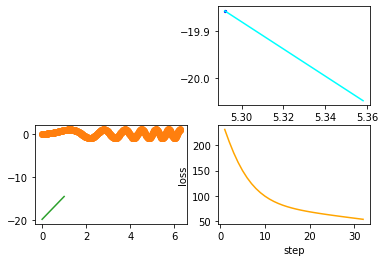

step:  33  loss:  52.13538200685723 rms_pear:  [0.14347921 0.18726202]  rms_apple [6200.18375172 1263.2085615 ]


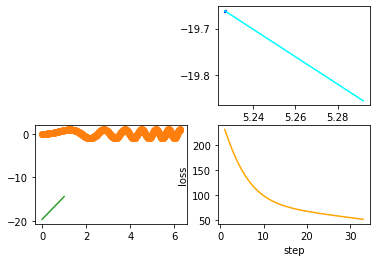

step:  34  loss:  51.026169231822486 rms_pear:  [0.14123304 0.19103394]  rms_apple [5943.91168415 1271.0872065 ]


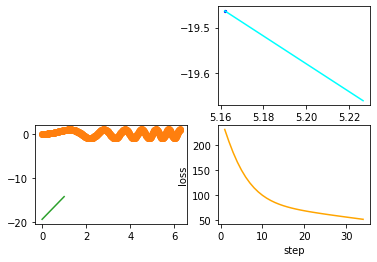

step:  35  loss:  49.92358424453842 rms_pear:  [0.13915959 0.19467889]  rms_apple [5699.42450062 1278.16116592]


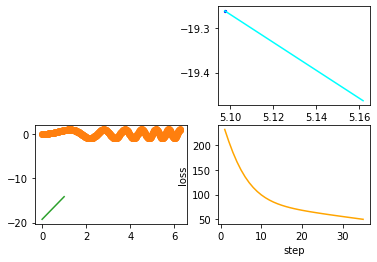

step:  36  loss:  48.82751321586197 rms_pear:  [0.13725172 0.19818271]  rms_apple [5466.24745508 1284.36257544]


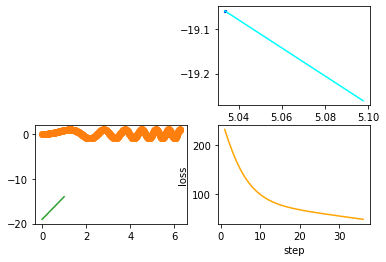

step:  37  loss:  47.73800041818632 rms_pear:  [0.13550177 0.20153639]  rms_apple [5243.89362197 1289.65716229]


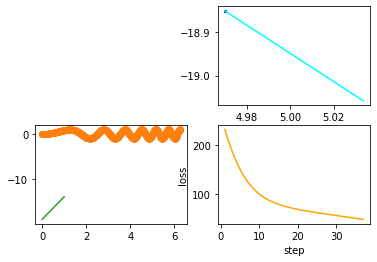

step:  38  loss:  46.65520751061254 rms_pear:  [0.13390163 0.20473507]  rms_apple [5031.86974142 1294.03634341]


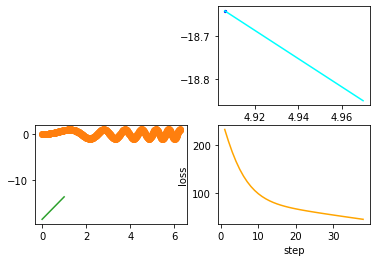

step:  39  loss:  45.57938333095252 rms_pear:  [0.13244289 0.20777716]  rms_apple [4829.68133994 1297.51066185]


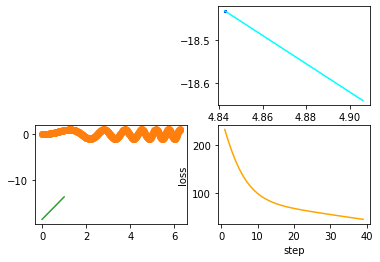

step:  40  loss:  44.51084149128877 rms_pear:  [0.13111692 0.21066359]  rms_apple [4636.83723545 1300.10440268]


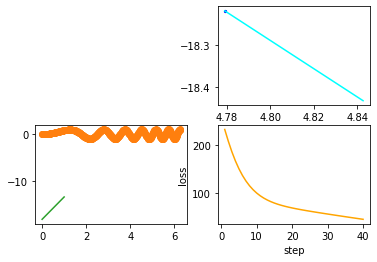

step:  41  loss:  43.449943667990155 rms_pear:  [0.12991496 0.21339718]  rms_apple [4452.85350008 1301.85122926]


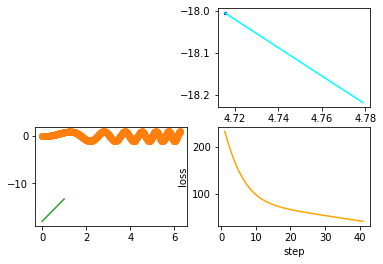

step:  42  loss:  42.397086973509175 rms_pear:  [0.12882822 0.2159821 ]  rms_apple [4277.2569269  1302.79069068]


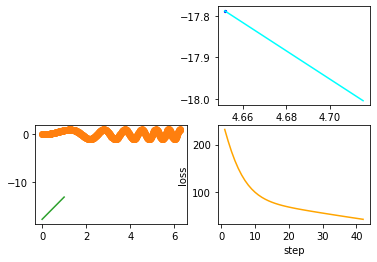

step:  43  loss:  41.35269420507734 rms_pear:  [0.12784795 0.21842344]  rms_apple [4109.58802686 1302.96546685]


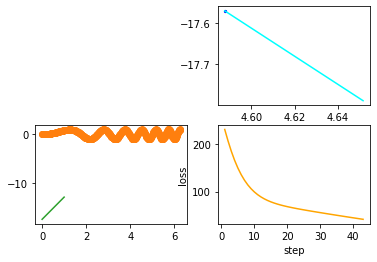

step:  44  loss:  40.31720609429073 rms_pear:  [0.12696552 0.22072679]  rms_apple [3949.40356957 1302.41923439]


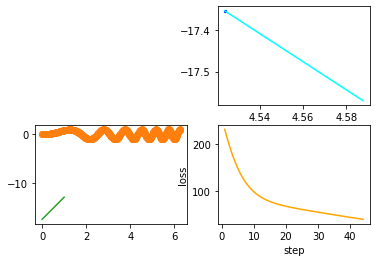

step:  45  loss:  39.29107494124163 rms_pear:  [0.12617248 0.22289802]  rms_apple [3796.27867495 1301.1950522 ]


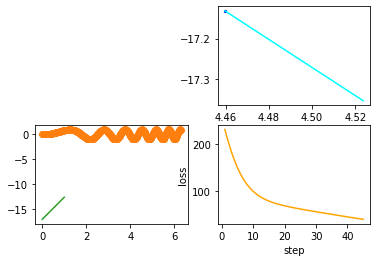

step:  46  loss:  38.27475921671564 rms_pear:  [0.12546061 0.224943  ]  rms_apple [3649.80846109 1299.33418041]


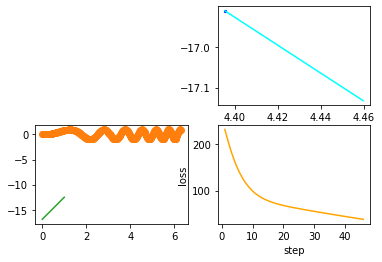

step:  47  loss:  37.26871886501971 rms_pear:  [0.12482201 0.2268674 ]  rms_apple [3509.60925701 1296.87525841]


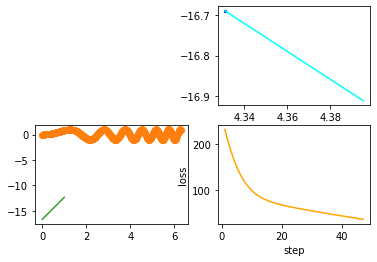

step:  48  loss:  36.27341114672102 rms_pear:  [0.1242491  0.22867662]  rms_apple [3375.31939393 1293.85377839]


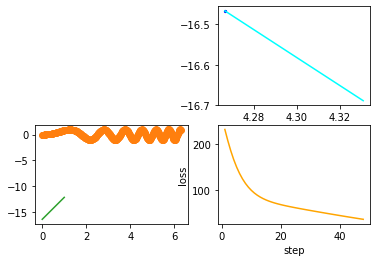

step:  49  loss:  35.28928693290872 rms_pear:  [0.12373469 0.23037562]  rms_apple [3246.59959669 1290.30179975]


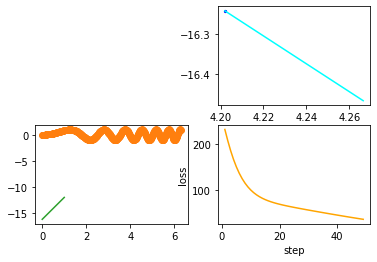

In [6]:
a = 10.0
b = -20.0

plt.ion() # iteration on

all_loss = []
all_step = []
last_a = a
last_b = b
n = np.array([0,0])
theta = np.array([0,0]).astype(np.float32) 

apple = np.array([0,0]).astype(np.float32)
pear = np.array([0,0]).astype(np.float32)

for step in range(1,50):
    loss = 0
    all_da = 0
    all_db = 0
    all_d = np.array([0,0]).astype(np.float32)
    for i in range(0,len(x)):
        y_p = a*x[i] + b
        loss = loss + (y[i] - y_p)*(y[i] - y_p)/2
        all_da = all_da + da(y[i],y_p,x[i])
        all_db = all_db + db(y[i],y_p)
    #loss_ = calc_loss(a = a,b=b,x=np.array(x),y=np.array(y))
    all_d = np.array([all_da,all_db])
    loss = loss/len(x)

    # 绘制图1中的loss点
    ax.scatter(a, b, loss, color='black')
    # 绘制图2中的loss点
    plt.subplot(2,2,2)
    plt.scatter(a,b,s=5,color='blue')
    plt.plot([last_a,a],[last_b,b],color='aqua')
    # 绘制图3中的回归直线
    plt.subplot(2, 2, 3)
    plt.plot(x, y)
    plt.plot(x, y, 'o')
    x_ = np.linspace(0, 1, 2)
    y_draw = a * x_ + b
    plt.plot(x_, y_draw)
    # 绘制图4的loss更新曲线
    all_loss.append(loss)
    all_step.append(step)
    plt.subplot(2,2,4)
    plt.plot(all_step,all_loss,color='orange')
    plt.xlabel("step")
    plt.ylabel("loss")

    # print('a = %.3f,b = %.3f' % (a,b))
    last_a = a
    last_b = b

    #-- 参数更新
    apple = gamma*apple + (1-gamma)*(all_d**2) # apple with all_d of this step
    rms_apple = np.sqrt(apple + epsilon)

    pear = gamma*pear + (1-gamma)*(theta**2) # pear with theta of last step
    rms_pear = np.sqrt(pear + epsilon)

    theta = -(rms_pear/rms_apple)*all_d
    [a,b] = [a,b] + theta

    if step%1 == 0:
        print("step: ", step, " loss: ", loss,"rms_pear: ",rms_pear," rms_apple",rms_apple)
        plt.show()
        plt.pause(0.01)

plt.show()